In [1]:
import json
import cv2
from PIL import Image, ImageDraw
import matplotlib.patches as patches
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imutils
import math
import skimage
from skimage import transform

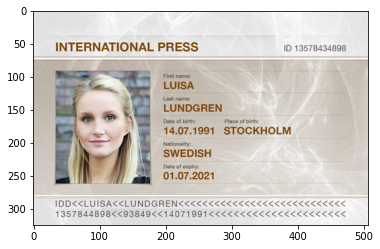

In [2]:
image = Image.open("abc.jpg")
plt.imshow(image)

In [3]:
f = open("via_project_21Apr2021_19h56m.json")
data = json.load(f)

In [4]:
data["_via_img_metadata"]

{'abc.jpg75186': {'filename': 'abc.jpg',
  'size': 75186,
  'regions': [{'shape_attributes': {'name': 'rect',
     'x': 59,
     'y': 105,
     'width': 96,
     'height': 117},
    'region_attributes': {'name': 'not_defined',
     'type': 'human',
     'image_quality': {'good': True},
     'class': {'face': True}}}],
  'file_attributes': {'caption': '', 'public_domain': 'no', 'image_url': ''}}}

In [5]:
dic = data["_via_img_metadata"]['abc.jpg75186']['regions'][0]['shape_attributes']

In [6]:
x = dic['x']
y = dic['y']
h = dic['height']
w = dic['width']

In [7]:
cX = np.array(image).shape[1] // 2
cY = np.array(image).shape[0] // 2

In [8]:
x1 = x
y1 = y
x2 = x + w
y2 = y
x3 = x + w
y3 = y + h
x4 = x
y4 = y + h

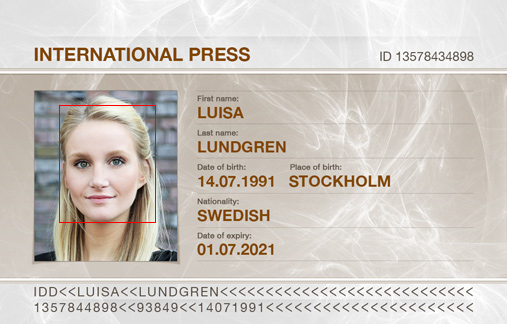

In [9]:
draw = ImageDraw.Draw(image)
draw.polygon([(x1,y1),(x2,y2),(x3,y3),(x4,y4)], outline="red")
display(image)

In [10]:
w = np.array(image).shape[1]
h = np.array(image).shape[0]
w,h

(507, 324)

In [11]:
def rotate_box(corners, angle,  cx, cy, h, w):
    
    corners = corners.reshape(-1,2)
    corners = np.hstack((corners, np.ones((corners.shape[0],1), dtype = type(corners[0][0]))))

    M = cv2.getRotationMatrix2D((cx, cy), angle, 1.0)


    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])

    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))
    # adjust the rotation matrix to take into account translation
    M[0, 2] += (nW / 2) - cx
    M[1, 2] += (nH / 2) - cy
    # Prepare the vector to be transformed
    calculated = np.dot(M,corners.T).T

    calculated = calculated.reshape(-1,8)

    if len(np.where(calculated[:, [0,2,4,6]] > w)) == 0 or len(np.where(calculated[:, [1,3,5,7]] > h)) == 0:
        return None

    x = list(calculated[0])
    cal = [(x[0],x[1]),(x[2],x[3]),(x[4],x[5]),(x[6],x[7])]
#     calculated = calculated.tolist()
#     cal = [(calculated[0][0],calculated[0][1]),(calculated[0][2],calculated[0][3]),(calculated[0][4],calculated[0][5]),(calculated[0][6],calculated[0][7])]

    
    return cal

In [12]:
coordinates = np.array([(x1,y1),(x2,y2),(x3,y3),(x4,y4)])
coordinates

array([[ 59, 105],
       [155, 105],
       [155, 222],
       [ 59, 222]])

In [20]:
angle = -150

In [21]:
r_img = cv2.imread("abc.jpg")
r_img = imutils.rotate_bound(r_img,angle)
cv2.imwrite("abc_test.jpg",r_img)

True

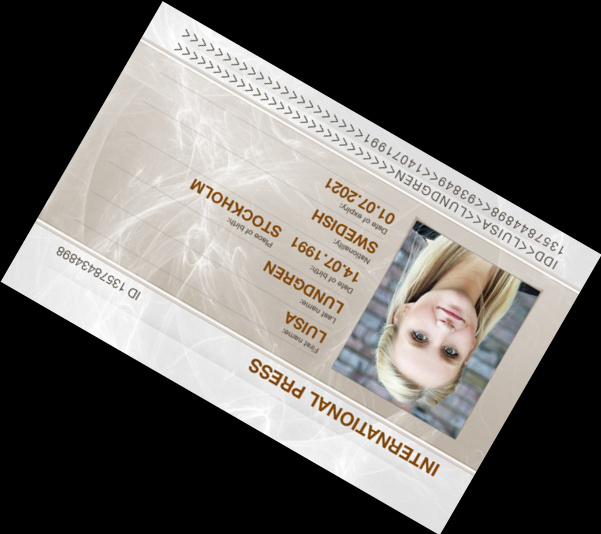

In [22]:
r_img = Image.open("abc_test.jpg")
# plt.imshow(r_img)
display(r_img)

In [23]:
coordinates

array([[ 59, 105],
       [155, 105],
       [155, 222],
       [ 59, 222]])

In [24]:
cX, cY, h, w

(253, 162, 324, 507)

In [25]:
coor = rotate_box(coordinates, -angle,  cX, cY, h, w)
coor

[(440.0089283341811, 413.363448015713),
 (356.870489570875, 365.363448015713),
 (415.370489570875, 264.0384757729337),
 (498.5089283341811, 312.0384757729337)]

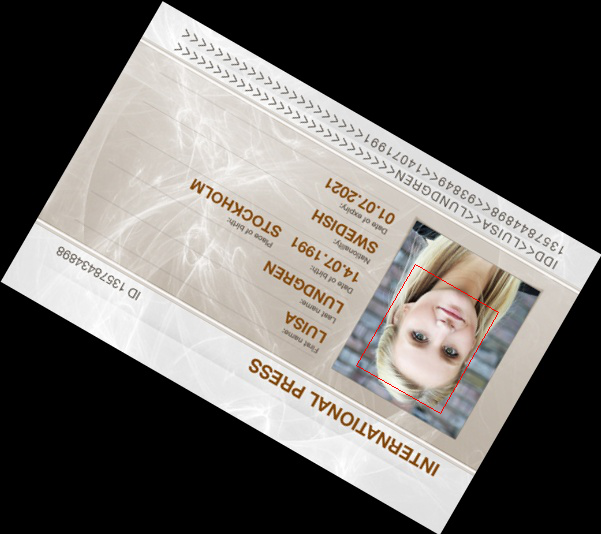

In [26]:
rIMG = Image.open('abc_test.jpg')
draw = ImageDraw.Draw(rIMG)
draw.polygon(coor, outline="red")
display(rIMG)